In [8]:
import sys, os
sys.path.append('../')
import matplotlib.pyplot as plt
import numpy as np
from scripts.scalability.postprocessing import read_case_dict, read_json, read_solution, solution_dict_to_df, solution_dict_2_pie

In [9]:
scalability_folder = '/home/ge72tih/dev/scalability'
json_dict = {}
json_dict[1] = '2019_05_28_13_08_17.json'
json_dict[2] = '2019_05_28_17_55_01.json'
json_dict[3] = '2019_05_29_09_20_02.json' # Beam Strong None
json_dict[4] = '2019_05_29_09_21_33.json' # Beam Strong Lumped
json_dict[5] = '2019_05_29_09_23_14.json' # Beam Weak Lumped
json_dict[6] = '2019_05_29_11_01_11.json' # Beam Weak None
json_dict[7] = '2019_05_29_14_43_41.json' # Beam Strong LumpedDirichlet
json_dict[8] = '2019_05_29_15_43_43.json' # Square Strong with log
json_dict[9] = '2019_05_30_18_23_49.json' # Beam
json_dict[10] = '2019_05_30_18_24_01.json' # Square weak without log
json_dict[11] = '2019_05_29_21_32_12.json' # Square weak with log
json_dict[12] = '2019_05_30_18_23_54.json' # Square strong without log
json_dict[13] = '2019_06_07_08_38_18.json' # Small Beam strong without log
json_dict[14] = '2019_06_07_10_07_48.json' # Small Beam strong without log Lumped
json_dict[15] = '2019_06_07_10_09_57.json' # Small Beam strong without log Dirichlet
json_dict[16] = '2019_06_14_14_40_33.json' # Small Beam strong without log
json_dict[17] = '2019_06_14_15_39_27.json' # Small Beam strong without log Lumped

json_id = 17
json_file = json_dict[json_id]
json_path = os.path.join(scalability_folder,json_file)

# reading json file
case_dict = read_json(json_path)
solution_dict = read_case_dict(scalability_folder ,case_dict)

In [10]:
df = solution_dict_to_df(solution_dict)

def get_primal_size_list():
    primal_size_list = []
    count = 0
    for key, s1 in case_dict.items():
        var = s1['case_info']['Kshape'][0]*s1['scalability_variables']['domainX'][count]*s1['scalability_variables']['domainY'][count]
        primal_size_list.append(var)
        count +=1
    return primal_size_list

s1 = case_dict[list(case_dict.keys())[0]]
tol = s1['scalability_variables']['tol']
scalability_type = 'Strong' if s1['scalability_variables']['strong'] else 'Weak'
BC_type = s1['scalability_variables']['BC_type']
precond = s1['scalability_variables']['precond']
primal_var = s1['case_info']['Kshape'][0]*s1['scalability_variables']['domainX'][0]*s1['scalability_variables']['domainY'][0]
primal_size_list = get_primal_size_list()
primal_var = primal_size_list[0]

In [11]:
print('Scalability type = %s' %scalability_type)
print('Boundary Conditions type = %s' %BC_type)
print('Preconditioner type = %s' %precond)
print('PCPG tolerance = %s' %tol)
print('Primal variables = %i' %primal_var )
df.loc['Primal size'] = list(map('{:2.0f}'.format, primal_size_list))[:df.shape[-1]]
#df.loc[row_label] = row
df



Scalability type = Strong
Boundary Conditions type = G
Preconditioner type = Lumped
PCPG tolerance = 0.001
Primal variables = 643204


,2,8,18,32
Total Time [s],215.37,49.50,63.25,23.69
Number of Iterations,11.00,37.00,96.00,40.00
PCPG time [s],15.63,20.15,52.22,17.65
Preprocessing [s],179.82,20.34,6.47,3.04
Interface size,802.00,4032.00,7276.00,10588.00
Kernel size,3.00,18.00,45.00,84.00
Primal size,643204,646416,646416,652864


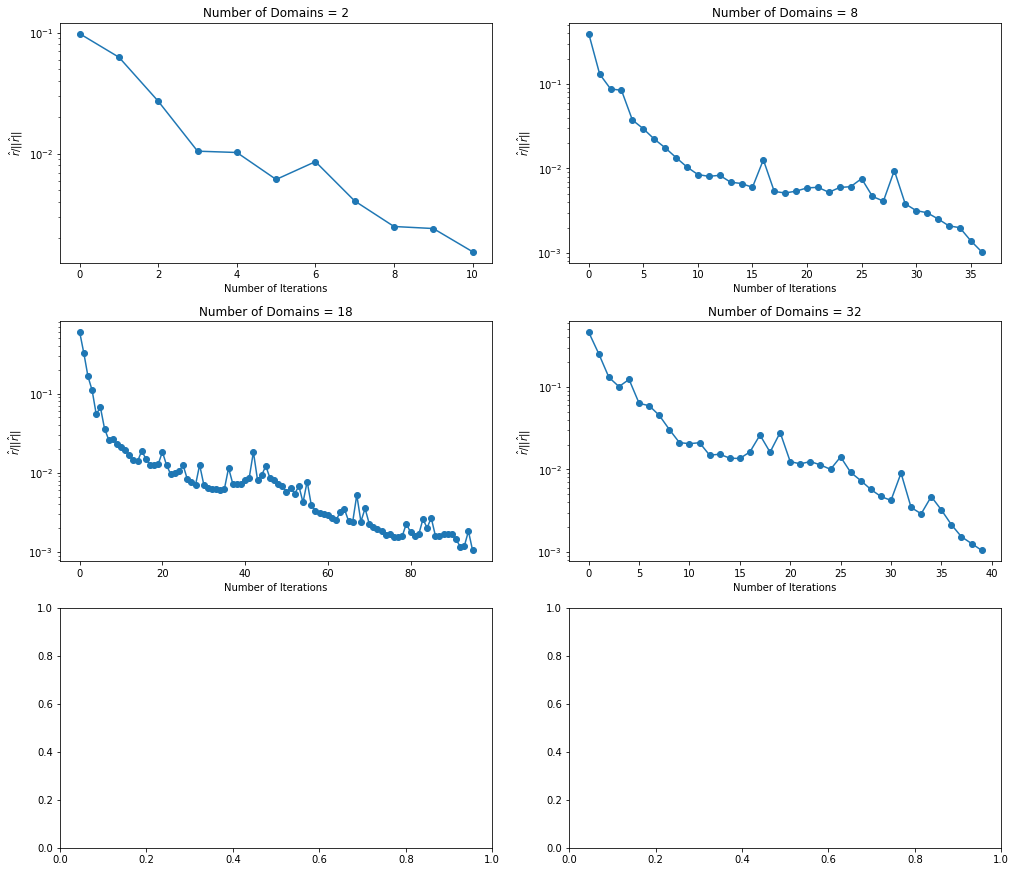

In [12]:
# define the figure size and grid layout properties
figsize = (14, 12)
cols = 2
rows = len(solution_dict) // cols + 1
fig1, axs = plt.subplots(rows, cols, figsize=figsize, constrained_layout=True)
for ax, case_key in zip(axs.flatten(), solution_dict):
    mult = tol/solution_dict[case_key].tolerance
    ax.plot(np.array(solution_dict[case_key].proj_r_hist)*mult,'-o')
    ax.set_title('Number of Domains = %s' %case_key)
    ax.set_xlabel('Number of Iterations')
    ax.set_ylabel('${\hat{r}}/{||\hat{r}||}$')
    ax.set_yscale('log')


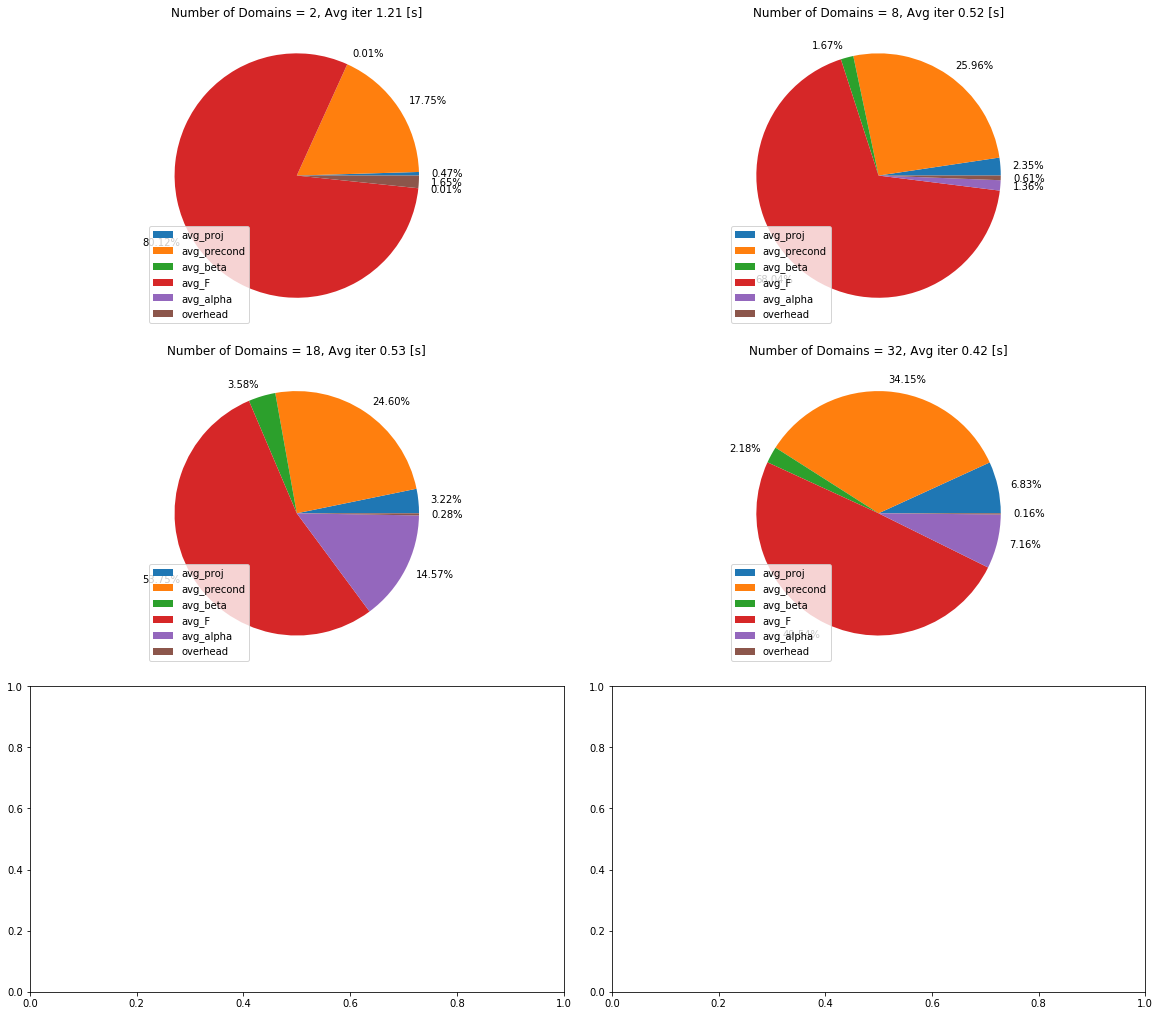

In [13]:
pie_dict, iter_dict = solution_dict_2_pie(solution_dict)
figsize = (16, 14)
fig2, axs = plt.subplots(rows, cols, figsize=figsize, constrained_layout=True)
for ax, case_key in zip(axs.flatten(), pie_dict):
    labels = pie_dict[case_key].keys() 
    patches, texts = ax.pie(pie_dict[case_key].values(),labels= list(map('{:2.2f}%'.format,100*np.array(list(pie_dict[case_key].values())))))
    ax.set_title('Number of Domains = %s, Avg iter %2.2f [s]' %(case_key,iter_dict[case_key]))
    ax.legend(patches, labels, loc=3)
    

Text(0.5, 1.0, 'application of F operator [s]')

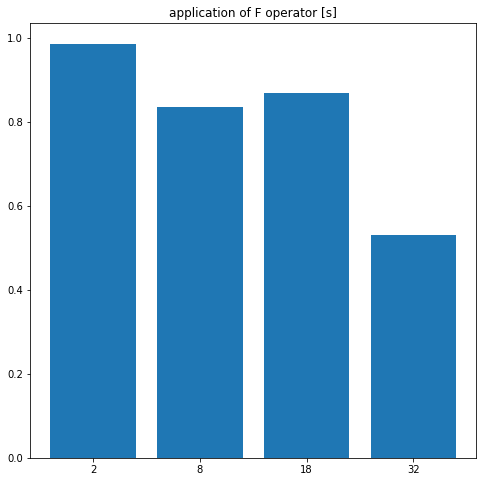

In [7]:
figsize = (8,8)
x = []
height = []
for key, item in pie_dict.items():
    x.append(key)
    height.append(item['avg_F'])
    
fig3, ax3 = plt.subplots(1, figsize=figsize)
ax3.bar(x,height)
ax3.set_title('application of F operator [s]')